In [10]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

In [7]:
data = pd.read_csv('../1_pandas_analysis/dataset/telecom_churn.csv')
data.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


[Text(0.5, 0, 'Количество звонков'), Text(0, 0.5, 'Плотность вероятности')]

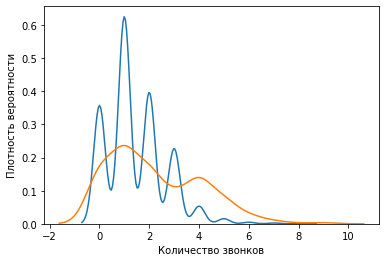

In [9]:
fig = sns.kdeplot(data[data['churn'] == False]['customer service calls'], label='Loyal')
fig = sns.kdeplot(data[data['churn'] == True]['customer service calls'], label='Churn')
fig.set(xlabel='Количество звонков', ylabel='Плотность вероятности')

Функция для генерации образцов бутстрэпом

In [47]:
def get_bootstrap_samples(data, n_samples):
    indexes = np.random.randint(0, len(data), (n_samples, len(data)))
    samples = data[indexes]
    return samples

Функция для интервальной оценки (границы внутри которых с заданной вероятностью мы попадаем)

In [48]:
def stat_intervals(stat, alpha):
    # функция для интервальной оценки
    boundaries = np.percentile(stat, [100 * alpha / 2., 100 * (1 - alpha / 2.)])
    return boundaries

Разобем клиентов на лояльных и нет

In [49]:
loyal_clients = data[data['churn'] == False]['customer service calls'].values
churn_clients = data[data['churn'] == True]['customer service calls'].values

In [50]:
loyal_clients, np.mean(loyal_clients)

(array([1, 1, 0, ..., 2, 2, 0], dtype=int64), 1.4498245614035088)

Сгенерируем массивы из 1000 бутсрэпов по среднему кол-ву звонков в обоих классах

In [51]:
get_bootstrap_samples(loyal_clients, 3)

array([[2, 1, 1, ..., 2, 2, 0],
       [0, 2, 1, ..., 4, 1, 1],
       [3, 3, 0, ..., 2, 2, 1]], dtype=int64)

In [53]:
loyal_client_scores = [np.mean(sample) for sample in get_bootstrap_samples(loyal_clients, 1000)]
churn_clients_scores = [np.mean(sample) for sample in get_bootstrap_samples(churn_clients, 1000)]

In [54]:
print("Service calls from loyal:  mean interval",  stat_intervals(loyal_client_scores, 0.05))
print("Service calls from churn:  mean interval",  stat_intervals(churn_clients_scores, 0.05))

Service calls from loyal:  mean interval [1.40804386 1.49158772]
Service calls from churn:  mean interval [2.07034161 2.38923395]
